# Index of context

1. Importing the modules.
2. Data importing.
3. Collecting information about the two dataset.
4. Joining the dataframes.
5. Genderwise competitive index.
6. Participants and winners in Summer and Winter Olympics.
7. Medals per country.
8. Olympic performance variation with Economic progress of nation.
9. Olympics performance variations with its Happiness index.
10. Countrywise participation.
11. Heatmap of yearwise sports.
12. Indians at Olympis
13. Genderwise medals by India
14. Yearwise medals by India
15. Conclusions.

# 1. Importing packages

In [1]:
#For data manipulation
import numpy as np
import pandas as pd

#For data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 2. Importing data to python environment

In [2]:
#Importing primary data
primary_data = pd.read_csv('summer_olympics.csv')

In [3]:
#Importing supportive data
region = pd.read_csv('noc_regions.csv')

In [4]:
#Importing supportive data
gdp = pd.read_csv('gdp_data.csv')

In [5]:
#Importing supportive data
happiness = pd.read_csv('2017_happiness.csv')

In [6]:
#mporting supportiive data
host = pd.read_csv('olym_host.csv')

In [7]:
#Importing supportive data
#This file is 15 MB, so might take some time to get loaded inside kernel

athlete_data = pd.read_csv('athlete_events.csv')

#Kindly Wait for below function to show output
athlete_data.head()

,Name,Sex,NOC,Year,Season,Sport,Event,Medal
0,A Dijiang,M,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,DEN,1920,Summer,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
#Verifying if files got loaded properly
print(primary_data.head(),region.head(),gdp.head(),happiness.head(),host.head(),athlete_data.head())

   Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver      NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN        Country Code  Year  GDP-Growth  GDP-Per-Capita  GD

# 3. Collecting and refining the information

We are going to:

Review the first lines of the data;
Use the describe and info functions to collect statistical information, datatypes, column names and other information.
Check how much impact can null values have on analysis. Drop them if necessary.

In [9]:
primary_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


Looking at the above data, we know that this is only about the winners.

In [10]:
primary_data.describe(include = "all")

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Describe function told us there are 22 unique cities in which summer olympics events are held. There have been 43 unique sports across 67 unique disciplines. Totoal of 22762 individuals in history have made it to win a medal at Olympics level.

USA is leading the winners chart and Football is the most frequent and popular event being played.

In [11]:
primary_data.Year.unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

In [12]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Let us convert these Objects to Categories.

In [13]:
# Defining a dictionary when key = column name, Value = data type in which it needs to be converted

dtype_dict = {"City": "category", "Sport": "category", "Discipline": "category", "Athlete": "category",
             "Discipline": "category", "Country": "category", "Gender": "category", "Event": "category", 
             "Medal": "category"}

#converting data type
primary_data = primary_data.astype(dtype_dict)
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        31165 non-null  int64   
 1   City        31165 non-null  category
 2   Sport       31165 non-null  category
 3   Discipline  31165 non-null  category
 4   Athlete     31165 non-null  category
 5   Country     31161 non-null  category
 6   Gender      31165 non-null  category
 7   Event       31165 non-null  category
 8   Medal       31165 non-null  category
dtypes: category(8), int64(1)
memory usage: 1.4 MB


You can see the primary_data just went from taking 2.1 MB to 1.4 MB of disk space just after we adjusted its data types. It is always a good practice to convert datatypes into proper ones.

In [14]:
# Checking how many null values are there in each column
primary_data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [15]:
#Filtering on Null Values
primary_data[pd.isnull(primary_data.Country)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver



So, 4 lines have pending Athletes as well as Null countries. How that can be ? Well, turns out, these 4 winners have violated the code of conducting Olympic games. Doping is taken very seriously at International level as it hurts the Spirit of the Game.

We shall just drop these 4 lines as a part of Data Cleaning.

In [16]:
# Dropping the null values rows
primary_data.dropna(inplace = True)
primary_data.shape

(31161, 9)

In [17]:
host.head()

,City,Country,NOC,Summer,Winter,Year,Latitude,Longitude
0,Athens,Greece,GRE,I,NaN,1896,37.983333,23.733334
1,Paris,France,FRA,II,NaN,1900,48.853410,2.348800
2,St. Louis,United States,USA,III,NaN,1904,38.627273,-90.197891
3,London,United Kingdom,GBR,IV,NaN,1908,51.508415,-0.125533
4,Stockholm,Sweden,SWE,V,NaN,1912,59.332577,18.064903


In [18]:
region.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


We shall join regions as well as host datasets to primary_data.

# 4. Joining the dataframes

We can now join the two dataframes using as key the NOC column with the Pandas 'Merge' function. For this to work effictively, we need to standardize the column names in our dataframes.

In [ ]:
region_temp = region.copy() # Create temp data and donot make changes to originaal daata set
region_temp.head()

#Dropping unnecessary columns
region_temp.drop(columns = "notes", inplace= True)
region_temp.head()

In [20]:
modified_primary_data=primary_data.copy()
modified_primary_data.rename(columns = {"Country":"NOC"}, inplace = True)

#Modifying primary data and we use left join
modified_primary_data = pd.merge(left = modified_primary_data, right = region_temp, on = "NOC", how='left')
modified_primary_data.head()

modified_primary_data.rename(columns = {"region": "winning country"}, inplace = True)
modified_primary_data.head()

,Year,City,Sport,Discipline,Athlete,NOC,Gender,Event,Medal,winning country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [21]:
# Making changes to primary data
primary_data= modified_primary_data
primary_data.shape

(31161, 10)

Let's see the result:

As we can see, host dataframe contains extra years. We will drop them after merging.

# 5. Competitive index among gender

Let's start creating a new dataframe in regards with counts of genderwise winners.

In [22]:
# Loading dataframe in temporary variable
winners = primary_data.copy()

# Steps Involved
# Step 1: Male Winners
# Step 2: Female Winners
# Step 3: Resetting Indices
# Step 4: Renaming column heading for merging
# Step 5: Merging both dataframes

# Male winners
male_winners = winners[winners.Gender == "Men"]
winner_male = male_winners.Year.value_counts().sort_index()
winner_male = pd.DataFrame(winner_male)

# Female winners
female_winners = winners[winners.Gender == "Women"]
winner_female = female_winners.Year.value_counts().sort_index()
winner_female = pd.DataFrame(winner_female)

# Resetting Indices (This is a good practice)
winner_male.reset_index(level = 0, inplace = True)
winner_female.reset_index(level = 0, inplace = True)

# Renaming column headings for merging purpose
winner_male.rename(columns = {"index":"Year", "Year": "Male Winners"}, inplace = True)
winner_female.rename(columns = {"index": "Year", "Year": "Female Winners"}, inplace = True)

# Merging both dataframes
all_winner_stats = pd.merge(left = winner_male, right = winner_female, how = "left", on = "Year")
all_winner_stats.set_index("Year", inplace = True)
all_winner_stats.head()

,Male Winners,Female Winners
Year,,
1896,151,NaN
1900,501,11.0
1904,458,12.0
1908,789,15.0
1912,855,30.0


We got the winner counts. Let us now try to calculate another dataframe containing gender wise participants

In [23]:
# Loading .csv
participants = athlete_data

# Steps Involved
# Step 1: Male Participants
# Step 2: Female Participants
# Step 3: Resetting Indices
# Step 4: Renaming column heading for merging
# Step 5: Merging both dataframes

# Male winners
male_participant = participants[participants.Sex == "M"]
participants_male = male_participant.Year.value_counts().sort_index()
participants_male = pd.DataFrame(participants_male)

# Female winners
female_participant = participants[participants.Sex == "F"]
participants_female = female_participant.Year.value_counts().sort_index()
participants_female = pd.DataFrame(participants_female)

# Resetting Indices (This is a good practice)
participants_male.reset_index(level = 0, inplace = True)
participants_female.reset_index(level = 0, inplace = True)

# Renaming column headings for merging purpose
participants_male.rename(columns = {"index":"Year", "Year": "Male Participants"}, inplace = True)
participants_female.rename(columns = {"index": "Year", "Year": "Female Participants"}, inplace = True)

# Merging both dataframes
all_participants_stats = pd.merge(left = participants_male, right = participants_female, how = "left", on = "Year")
all_participants_stats.set_index("Year", inplace = True)
all_participants_stats.head()


,Male Participants,Female Participants
Year,,
1896,380,NaN
1900,1903,33.0
1904,1285,16.0
1906,1722,11.0
1908,3054,47.0


In [24]:
# Merging both Participants and Winners dataframe
all_stats = pd.merge(left = all_winner_stats, right = all_participants_stats, on = "Year")
all_stats.head()

,Male Winners,Female Winners,Male Participants,Female Participants
Year,,,,
1896,151,NaN,380,NaN
1900,501,11.0,1903,33.0
1904,458,12.0,1285,16.0
1908,789,15.0,3054,47.0
1912,855,30.0,3953,87.0


We see that the number of participants and winners have increased each time.
Let us count the ratio = Number of Winners/Number of Participants. This will help us learn our chances of winning.

In [25]:
# Calculations for male competition index (easy syntax)
all_stats["Male competition index"] = all_stats["Male Winners"]/all_stats["Male Participants"]
#all_stats["Male competition index"]

# Calculations for female competition index (easy syntax)
all_stats["Female competition index"] = all_stats["Female Winners"]/all_stats["Female Participants"]
# all_stats["Female competition index"]

# Calculate total
all_stats["Total Competition"] = (all_stats["Male Winners"]+all_stats["Female Winners"])/(all_stats["Male Participants"]+all_stats["Female Participants"])
all_stats.head()

,Male Winners,Female Winners,Male Participants,Female Participants,Male competition index,Female competition index,Total Competition
Year,,,,,,,
1896,151,NaN,380,NaN,0.397368,NaN,NaN
1900,501,11.0,1903,33.0,0.263269,0.333333,0.264463
1904,458,12.0,1285,16.0,0.356420,0.750000,0.361261
1908,789,15.0,3054,47.0,0.258350,0.319149,0.259271
1912,855,30.0,3953,87.0,0.216291,0.344828,0.219059


Now we have the datapoints to predict the trend

ValueError: x and y must have same first dimension, but have shapes (1,) and (27,)

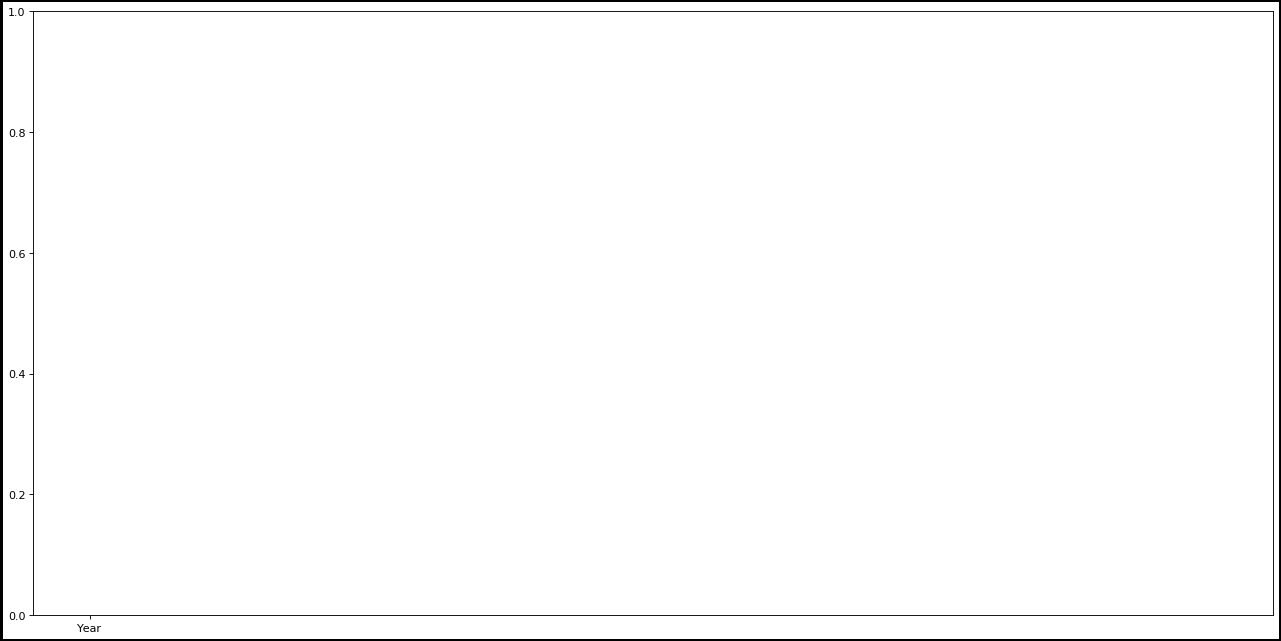

In [26]:
#Defining size, background color, edge color, resolution of the plot
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)

#Plotting X axis as Year and Y axes as competition indices
plt.plot( 'Year', 'Total Competition', data=all_stats, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot( 'Year', 'Male competition index', data=all_stats, marker='', color='olive', linewidth=2)
plt.plot( 'Year', 'Female competition index', data=all_stats, marker='', color='r', linewidth=2,  label="Female competition index")

#Defining scale on X and Y axis
plt.xticks(np.arange(1896, 2015, 4))
plt.yticks(np.arange(0,1,0.05))

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Competition index")
plt.show()

#Saving generated plot as JPG image
#fig.savefig('test.jpg')

Lesser the value of competition index simply means more and more individuals are participating, which also mean increased competition.

From the plot above, we can observe that competition index for men and overall index trend is going hand in hand. But for Females, it is not quite predictable.

This trend was affected by number of factors. World wars 1 and 2 for instance in 1910 and 1940 respectively.

For females born in middle east culture, they have had lesser opportunities to excel in Sports due to several religious ideologies in their society. But with the fall of Ottoman empire in 1922, the competition trend in females also stabilised with rest, as can be seen from the plot.

The trend have had its ups and downs. A single global economical, political or even geographical event can produce butterfly effects on unimaginable scales at International Olympics levels. It is so chaotic that we can never predict the future states of it properly.

What can be the reason for increasing competition levels ? Rapid growth of human population in 20th century is definetely one of the reason. Rapid economic, technological progress can also be one of the reason.

Let us analyse more data to come to the conclusion.

# 6. Participants and winners in Olympics

Analyzing the data we can understant how many medals we won

Let us create a filtered datasets based on the genders
For winners

In [45]:
# Extracting only male winners:
male_olympics = primary_data[primary_data.Gender == "Men"]
male_olympics.head()

,Year,City,Sport,Discipline,Athlete,NOC,Gender,Event,Medal,winning country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [46]:
# Extracting only female winners:
female_olympics = primary_data[primary_data.Gender == "Women"]
female_olympics.head()

,Year,City,Sport,Discipline,Athlete,NOC,Gender,Event,Medal,winning country
416,1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze,USA
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold,USA
418,1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver,USA
639,1900,Paris,Tennis,Tennis,"JONES, Marion",ZZX,Women,Mixed Doubles,Bronze,NaN
640,1900,Paris,Tennis,Tennis,"ROSENBAUM, Hedwig",ZZX,Women,Mixed Doubles,Bronze,NaN


For Participants:

In [69]:
# Avoid spelling mistakes when calling dataset - Type mindfully!

# Extracting the seasons
seasons = athlete_data['Season'].unique
# seasons

# Extracting only Male Participants
male_in_olympics_summer = athlete_data[(athlete_data.Sex == "M") & (athlete_data.Season == 'Summer')]
male_in_olympics_winter = athlete_data[(athlete_data.Sex == "M") & (athlete_data.Season == 'Winter')]
# male_in_olympics_summer.head()
# male_in_olympics_winter.head()


# Extracting only Female Participants
female_in_olympics_summer = athlete_data[(athlete_data.Sex == "F") & (athlete_data.Season == 'Summer')]
female_in_olympics_winter = athlete_data[(athlete_data.Sex == "F") & (athlete_data.Season == 'Winter')]

# female_in_olympics_summer.head()
# female_in_olympics_winter.head()

In [68]:
# Avoid spelling mistakes when calling dataset - Type mindfully!

Plotting graph based on extracted data

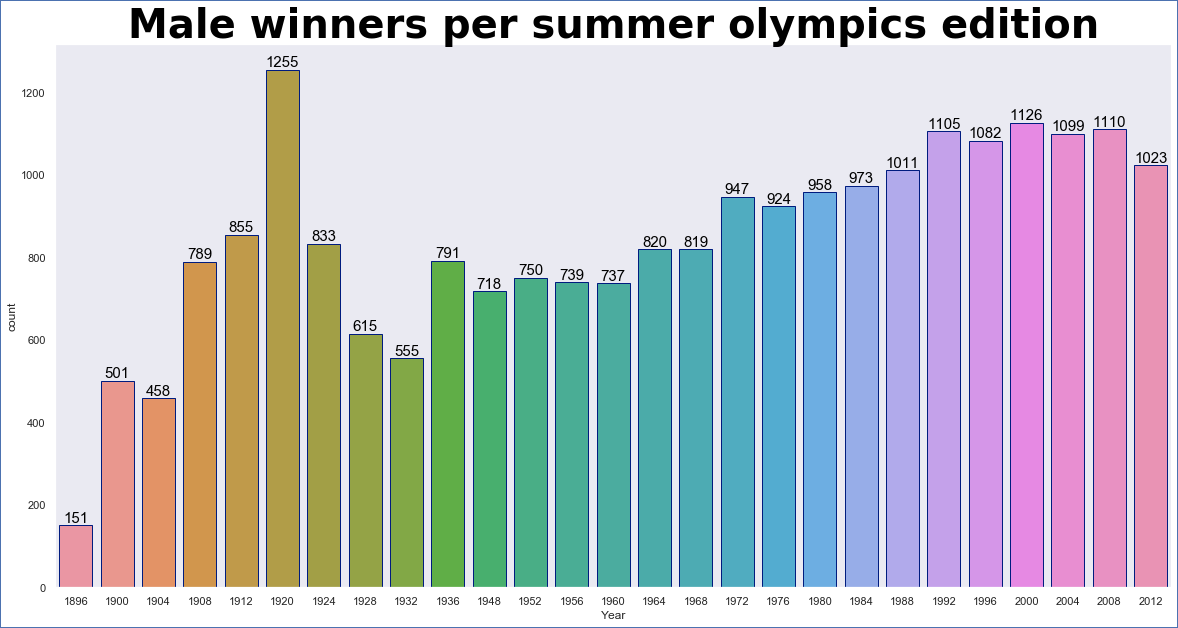

In [82]:
# Steps involved (They will repeat for - Male winners, Male participants, Female winners, Femal Participants)
# Step 1: Setting background syles
# Step 2: Setting plot size and edgecolor
# Step 3: Creating plot
# Step 4: Adding value to plot
# Step 5: Manipulating title visuals

# Setting background syles
sns.set(style="dark")

# Setting plot size and edgecolors
plt.figure(figsize=(20, 10), edgecolor = "b", linewidth=2)

# Creating plot
male_winners = sns.countplot(x='Year', data=male_olympics, edgecolor=sns.color_palette("dark", 1))

# Adding value labels to plot
for p in male_winners.patches:
    male_winners.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                      fontsize=15, color='black', ha='center', va='bottom')
    
    #Manipulating title visuals
    titlefont = {'family': 'calibri', 'color': 'black', 'weight':'bold', 'size': 40}
    plt.title('Male winners per olympics edition', fontdict = titlefont, loc='center')

Text(0.0, 1.0, 'Male participants per summer olmypics edition')

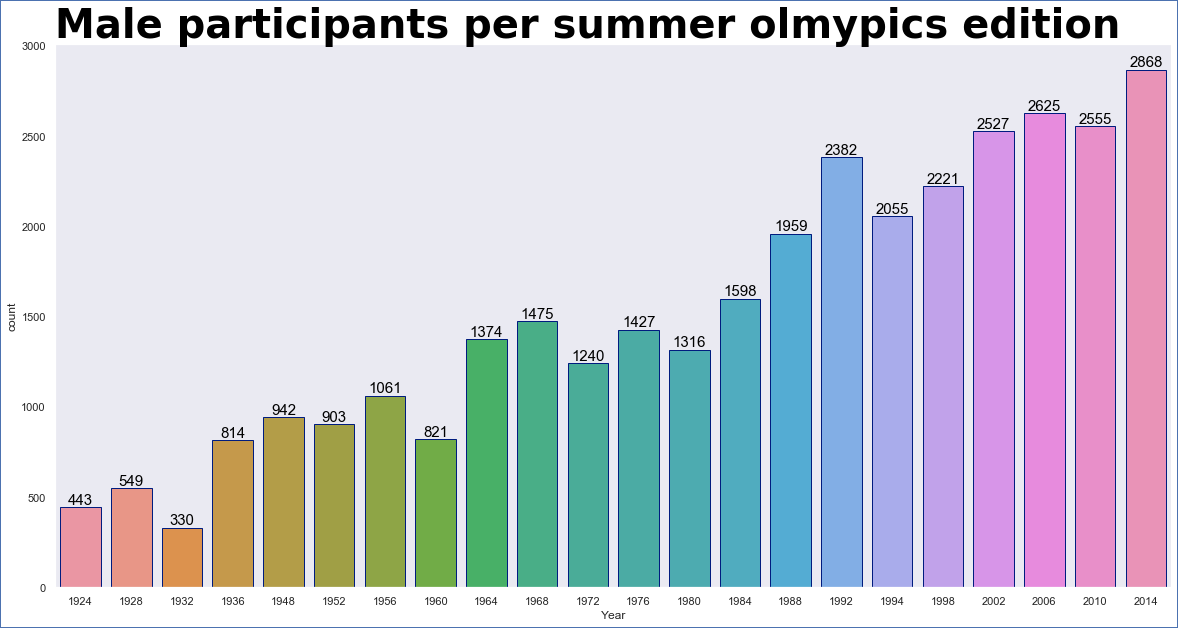

In [95]:
# Steps involved  (We repeat)
# Step 1: Setting background syles
# Step 2: Setting plot size and edgecolor
# Step 3: Creating plot
# Step 4: Adding value to plot
# Step 5: Manipulating title visuals

# Setting background styles
sns.set(style='dark')

# Setting plot size and edgecolors
plt.figure(figsize=(20,10), edgecolor = 'b', linewidth = 2)

# Creating plot
male_participants = sns.countplot(x='Year', data=male_in_olympics, edgecolor=sns.color_palette('dark',1))

# Adding Value labels to plot
# for p in male_participants.patches:
#     male_participants.text(p.get_x() + p.get.width()/2., p.get_height(), '%d' % int(p.get_height()),
#                            fontsize=15, color='black', ha='center', va='bottom')

#Adding value labels to plot
for p in male_participants.patches:
    male_participants.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')
    
#Manipulating title visuals
titlefont = {'family':'calibri','color':'black', 'weight':'bold', 'size': 40}
plt.title('Male participants per olmypics edition', fontdict = titlefont,  loc = 'left')

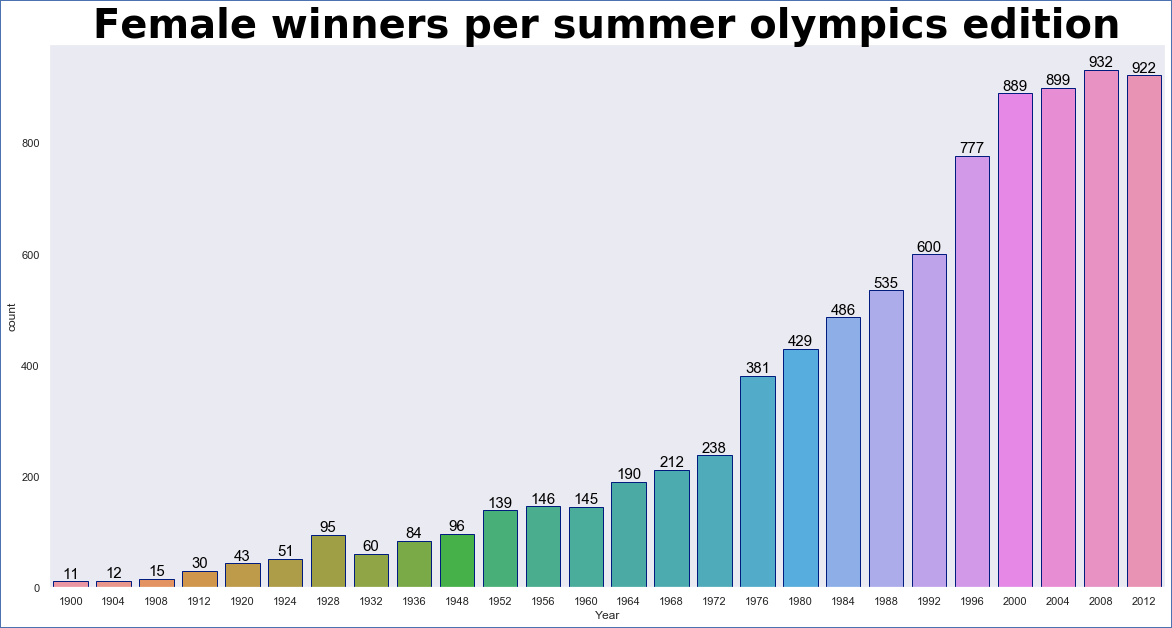

In [108]:
# Steps involved (We repeat)
# Step 1: Setting background syles
# Step 2: Setting plot size and edgecolor
# Step 3: Creating plot
# Step 4: Adding value to plot
# Step 5: Manipulating title visuals

# Step 1: Setting background syles
sns.set(style='dark')

# Step 2: Setting plot size and edgecolor
plt.figure(figsize=(20,10), edgecolor="b", linewidth = 2)

# Step 3: Creating plot (graph)
female_winners = sns.countplot(x='Year', data=female_olympics, edgecolor=sns.color_palette("dark",1))

# Step 4: Adding value to plot
for p in female_winners.patches:
    female_winners.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')

# Step 5: Manipulating title visuals
    titlefont = {'family': 'calibri', 'color': 'black', 'weight':'bold', 'size': 40}
    plt.title('Female winners per olympics edition', fontdict = titlefont, loc='center')

Text(0.0, 1.0, 'Female participants per summer olmypics edition')

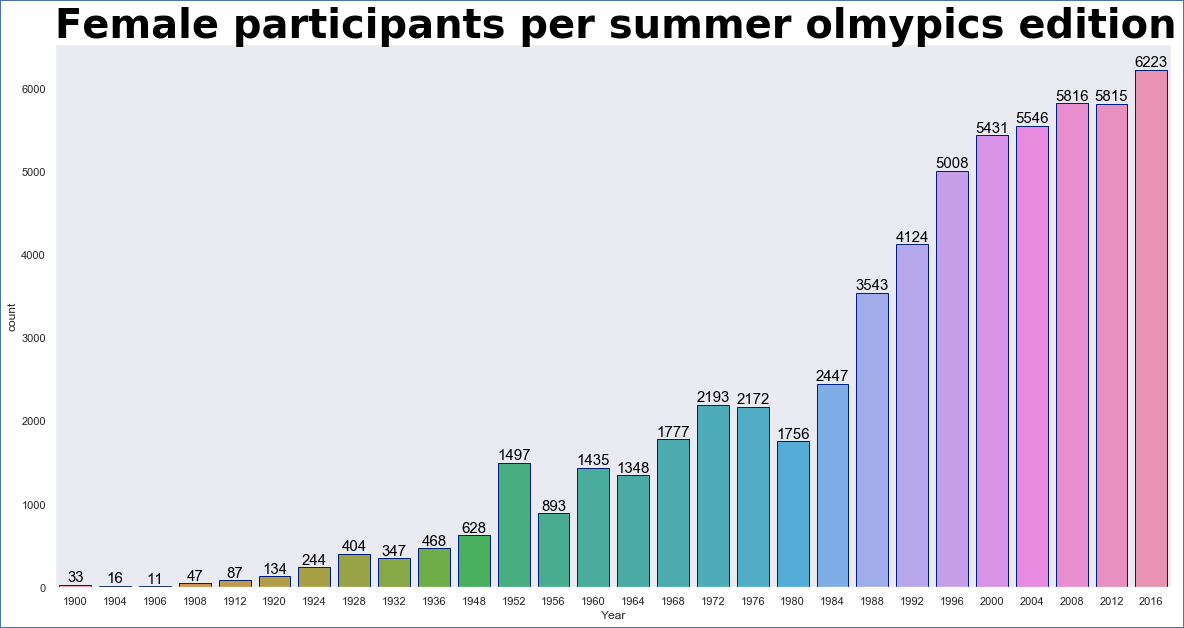

In [110]:
# Steps involved  (We repeat)
# Step 1: Setting background syles
# Step 2: Setting plot size and edgecolor
# Step 3: Creating plot
# Step 4: Adding value to plot
# Step 5: Manipulating title visuals

# Setting background styles
sns.set(style='dark')

# Setting plot size and edgecolors
plt.figure(figsize=(20,10), edgecolor = 'b', linewidth = 2)

# Creating plot
female_participants = sns.countplot(x='Year', data=female_in_olympics, edgecolor=sns.color_palette('dark',1))

#Adding value labels to plot
for p in female_participants.patches:
    female_participants.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')
    
#Manipulating title visuals
titlefont = {'family':'calibri','color':'black', 'weight':'bold', 'size': 40}
plt.title('Female participants per olmypics edition', fontdict = titlefont,  loc = 'left')

Good Job! Let  us review our work

We can see both participation of athletes as well as winning medals have been on increasing trend since the beginning.

We can observe a sharp increase in winner tally in 1920 olympics. Wonder what made it like that ?

The 1920 Olympics were awarded to Antwerp in hopes of bringing a spirit of renewal to Belgium, which had been devastated during World War I. The defeated countries — Germany, Austria, Hungary, Bulgaria, and Turkey—were not invited.

Well, that explains the plot as lesser participants were there.